In [ ]:
import pandas, seaborn
import sklearn, sklearn.cluster
import matplotlib
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6), 'axes.labelsize':20})

In [ ]:
storing_file = '/content/drive/MyDrive/hi/research/huvec/results/untargeted/heatmap_info.csv'
df = pandas.read_csv(storing_file, index_col=0)
df.head(20)

,0,1,2,3,4,5
Excluded bc early ret. t 883.5047,-0.401530,-0.684538,-0.973002,-0.372592,-0.365333,-0.417204
Excluded bc early ret. t 441.25073,0.235665,0.480701,0.258212,0.522513,0.893873,0.868788
hypothiocyanite,0.327894,0.120017,1.206317,0.318544,0.229605,0.537656
phosphate,0.417796,0.994065,0.905833,-0.448531,-0.022440,-0.750007
N-acetyl-glutamate,-0.324190,-0.540060,-1.015238,0.039214,-0.143395,-0.290712
reduced glutathione,-0.322201,-0.239050,-1.393417,0.357178,0.012852,0.020511
96.91994,0.131543,-0.163627,-0.047518,-0.492042,-0.526036,-1.148604
arginine,-0.440515,-0.284513,-0.157829,0.771529,0.515705,1.040314
794.42386,0.441432,0.552105,0.437386,-0.245329,-0.519875,-0.877299
Excluded bc early ret. t 360.08832,-0.548610,-0.472062,-1.267025,-0.049619,0.083020,-0.317398


In [ ]:
# detect duplications. create an average and remove
features = df.index.to_list()
multiplets = []
for element in features:
  if features.count(element) > 1:
    multiplets.append(element)
multiplets = list(set(multiplets))
print(len(multiplets), multiplets)

9 ['ascorbate', 'methanephrine sulfate', 'hypothiocyanite', 'reduced glutathione', 'N-acetyl-glutamate', 'cholesterol derivative', 'phosphatidylinositol 38:5', 'FeCl2', 'pantothenic acid']


In [ ]:
for multiplet in multiplets:
  new_name = '{}_average'.format(multiplet)
  print(new_name)
  average = pandas.DataFrame(df.loc[multiplet].mean(), columns=[new_name]).transpose()
  df = df.append(average)
  df.drop(multiplet, inplace=True)

ascorbate_average
methanephrine sulfate_average
hypothiocyanite_average
reduced glutathione_average
N-acetyl-glutamate_average
cholesterol derivative_average
phosphatidylinositol 38:5_average
FeCl2_average
pantothenic acid_average


In [ ]:
print(df.shape)
df.head(20)

(46, 6)


,0,1,2,3,4,5
Excluded bc early ret. t 883.5047,-0.401530,-0.684538,-0.973002,-0.372592,-0.365333,-0.417204
Excluded bc early ret. t 441.25073,0.235665,0.480701,0.258212,0.522513,0.893873,0.868788
phosphate,0.417796,0.994065,0.905833,-0.448531,-0.022440,-0.750007
96.91994,0.131543,-0.163627,-0.047518,-0.492042,-0.526036,-1.148604
arginine,-0.440515,-0.284513,-0.157829,0.771529,0.515705,1.040314
794.42386,0.441432,0.552105,0.437386,-0.245329,-0.519875,-0.877299
Excluded bc early ret. t 360.08832,-0.548610,-0.472062,-1.267025,-0.049619,0.083020,-0.317398
Excluded bc early ret. t 485.279,0.256853,0.259298,0.307414,0.481218,0.776339,0.811249
97.00953,-1.625257,-1.171668,-1.240728,0.035955,0.212460,0.306822
Excluded bc early ret. t 797.51549,-0.438642,-0.443705,-0.963922,0.096125,-0.267424,0.097321


# partition

In [ ]:
x = df.to_numpy()
k_range = range(3, 12+1)

In [ ]:
pvx = []; pvy = []; all_labels = []
for k in k_range:

  kmeans_model = sklearn.cluster.AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete').fit(x)
  labels = kmeans_model.labels_
  
  ss = sklearn.metrics.silhouette_score(x, labels, metric='cosine')
  khi = sklearn.metrics.calinski_harabasz_score(x, labels)
  dbi = sklearn.metrics.davies_bouldin_score(x, labels)

  print(k, ss, khi, dbi)
  pvx.append(k)
  pvy.append(dbi)
  all_labels.append(labels)

3 0.6361774205558008 23.8810634497214 0.916040476465514
4 0.5629712507890673 17.618035795281767 1.0375198871518874
5 0.5807624753809586 14.675463872187976 1.0413444639479015
6 0.586115644967571 13.079499610220562 1.0123862107401316
7 0.617760806196606 13.867651098858804 1.0692891512428868
8 0.6266582763043261 12.156847562853585 1.0016352939146487
9 0.5908249994901033 10.720383849202328 0.9715857967474335
10 0.6532440414748264 9.751709173297549 0.9334636245602258
11 0.6156632489167541 8.675466720421072 0.9116882374266067
12 0.5906469769400922 8.043220395807534 0.8503938447291532


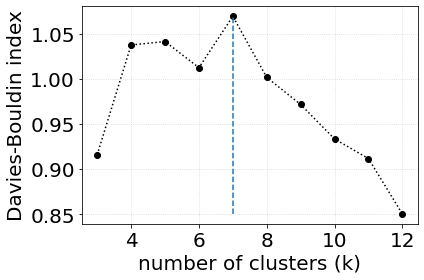

In [ ]:
best_partition_index = 4
worst_partition_index = -1

matplotlib.pyplot.plot(pvx, pvy, 'ok')
matplotlib.pyplot.plot(pvx, pvy, ':', color='black')
matplotlib.pyplot.plot([pvx[best_partition_index], pvx[best_partition_index]], [pvy[worst_partition_index], pvy[best_partition_index]], ls='--')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Davies-Bouldin index')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('/content/drive/MyDrive/hi/research/huvec/results/untargeted/davies-bouldin_index.svg')

In [ ]:
groupings = all_labels[best_partition_index]
groupings

array([1, 6, 0, 2, 5, 0, 1, 6, 1, 1, 4, 4, 2, 1, 0, 6, 0, 2, 2, 0, 4, 0,
       3, 4, 5, 0, 1, 2, 0, 2, 0, 6, 5, 5, 6, 6, 6, 5, 6, 3, 1, 1, 6, 1,
       0, 1])

In [ ]:
color_options = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:gray', 'tab:olive']
k_colors = []
for i in range(len(df.index)):
  k_colors.append(color_options[groupings[i]])

8
['tab:orange', 'tab:olive', 'tab:blue', 'tab:green', 'tab:gray']


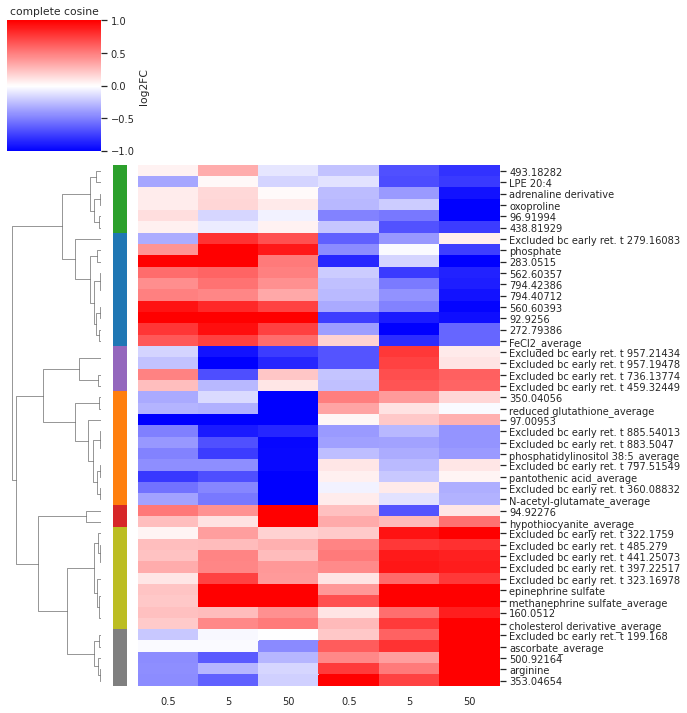

In [ ]:
# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df, cmap='bwr', col_cluster=False, vmin=-1, vmax=1, method=linkage_method, metric=distance_metric, yticklabels=1, xticklabels = ['0.5', '5', '50', '0.5', '5', '50'], cbar_kws={'label':'log2FC'}, row_colors=k_colors)

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('/content/drive/MyDrive/hi/research/huvec/results/untargeted/heatmap.svg')